In [1]:
# sae_results/ae_layer12/nz_feature_ind.pt sae_results/ae_layer12/total_reward_diff.pt check_top_reward.ipynb
import torch
# ae_name = 'ae_layer12'
# nz_feature_ind = torch.load(f'sae_results/{ae_name}/nz_feature_ind.pt')
# total_reward_diff = torch.load(f'sae_results/{ae_name}/total_reward_diff.pt')
# all_effects = torch.load(f'sae_results/{ae_name}/all_effects.pt')
layers = [2,8,12,14,16,20]
tokens = 500
top = 2000
effects = []
for layer in layers:
    ae_name = f'ae_layer{layer}'
    all_effects = torch.load(f'sae_results/{ae_name}/all_effects_per_feature_token_{tokens}_top_{top}.pt')
    effects.append(all_effects)


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/root/sae-rm/logan/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/root/sae-rm/logan/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/root/sae-rm/logan/lib/python3.10

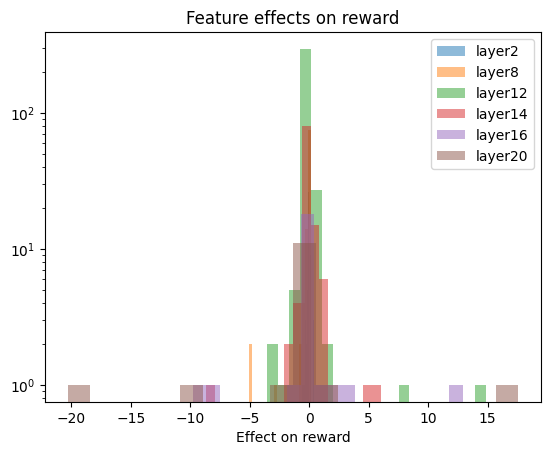

In [26]:
# plot hist
import matplotlib.pyplot as plt
for layer_ind, layer in enumerate(layers):
    all_effects = effects[layer_ind].mean(0)
    # remove all effects above some threshold
    threshold = 0.05
    all_effects = all_effects[all_effects.abs() > threshold]
    # set max threshold
    # all_effects = all_effects[all_effects.abs() < 5]
    plt.hist(all_effects.tolist(), bins=20, alpha=0.5, label=f'layer{layer}')
plt.legend()
#log y scale
plt.title("Feature effects on reward")
plt.xlabel("Effect on reward")
plt.yscale('log')
plt.show()

In [33]:
effects[-1].mean(0).topk(10), effects[-1].mean(0).topk(10, largest=False)

(torch.return_types.topk(
 values=tensor([17.5995,  1.5447,  0.2952,  0.1416,  0.1164,  0.1141,  0.0896,  0.0560,
          0.0557,  0.0408]),
 indices=tensor([ 8767, 25789,  5362, 14416,  1360, 23264, 24957,  7086, 17303,  3940])),
 torch.return_types.topk(
 values=tensor([-2.0322e+01, -1.0328e+01, -1.9008e+00, -8.2906e-01, -5.0996e-01,
         -3.0520e-01, -2.8384e-01, -1.4539e-02, -1.3308e-02, -1.2313e-02]),
 indices=tensor([17576, 15966, 28697, 23386,  7673,  3732,  4211, 12458, 18575, 27902])))

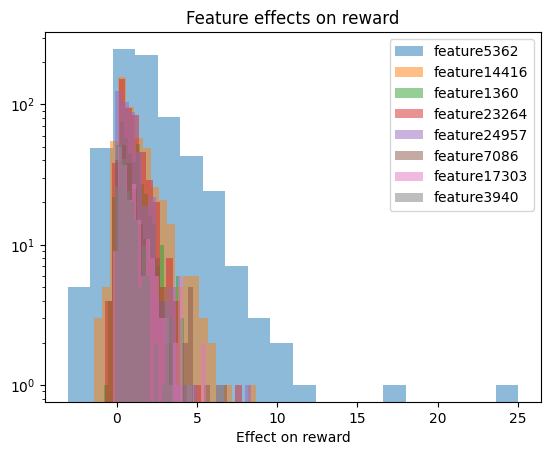

In [41]:
# for f in [ 8767, 25789,  5362, 14416,  1360, 23264, 24957,  7086, 17303,  3940]:
for f in [5362, 14416,  1360, 23264, 24957,  7086, 17303,  3940]:
# for f in [ 8767]:
    # plot a new histogram
    eff = effects[-1][:,f]
    threshold = 0.05
    eff = eff[eff.abs() > threshold]
    plt.hist(eff.tolist(), bins=20, alpha=0.5, label=f'feature{f}')
plt.legend()
plt.title("Feature effects on reward")
plt.xlabel("Effect on reward")
plt.yscale('log')
plt.show()

In [4]:
total_reward_diff.shape, total_reward_diff[0], all_effects.shape

(torch.Size([9180, 10]),
 tensor([ 9.5367e-07,  9.5367e-07,  5.9605e-07,  9.5367e-07,  9.5367e-07,
          1.9073e-06,  0.0000e+00,  2.8610e-06, -2.8610e-06, -1.9073e-06]),
 torch.Size([12864, 32768]))

/tmp/ipykernel_390730/4150278513.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


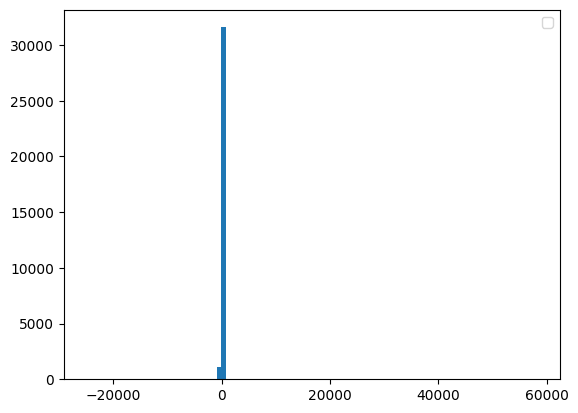

In [21]:
from matplotlib import pyplot as plt
eff = all_effects.sum(0)
# eff = eff[eff != 0]
plt.hist(eff, bins=100)
# log x axis
# plt.xscale('log')
plt.legend()
plt.show()

/tmp/ipykernel_390730/4119892399.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


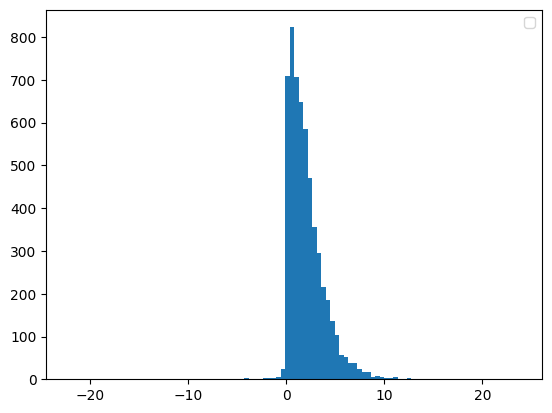

In [27]:
e1 = all_effects[:, 20512]
e1 = e1[e1 != 0]
plt.hist(e1, bins=100)
plt.legend()
plt.show()

/tmp/ipykernel_390730/4089727553.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


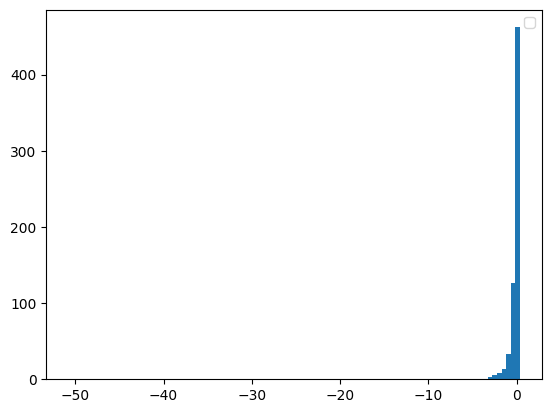

In [28]:
e1 = all_effects[:, 20512]
e1 = e1[e1 != 0]
plt.hist(e1, bins=100)
plt.legend()
plt.show()

/tmp/ipykernel_390730/4254747304.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


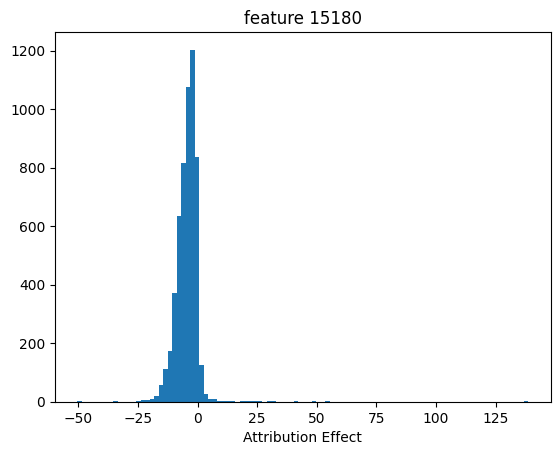

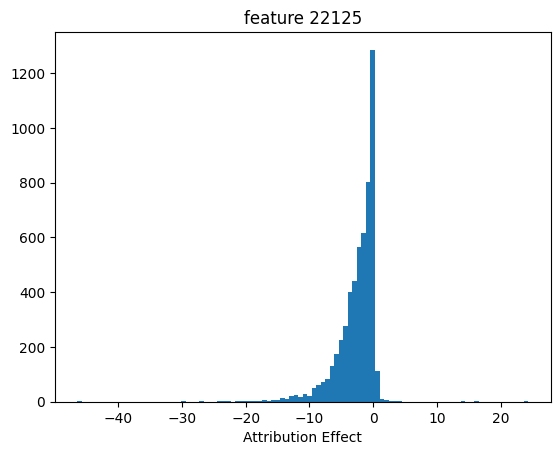

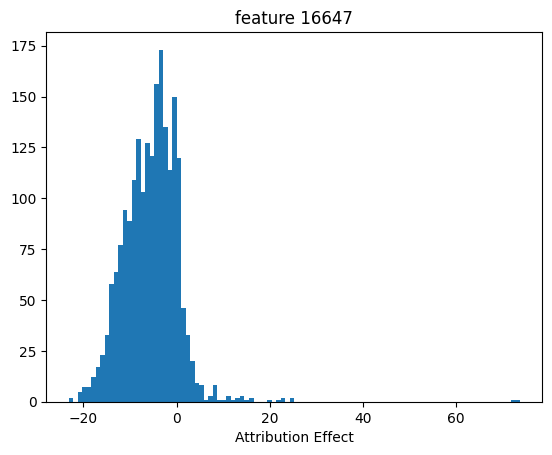

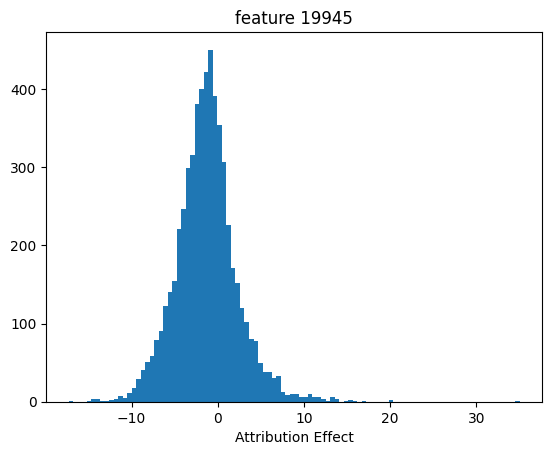

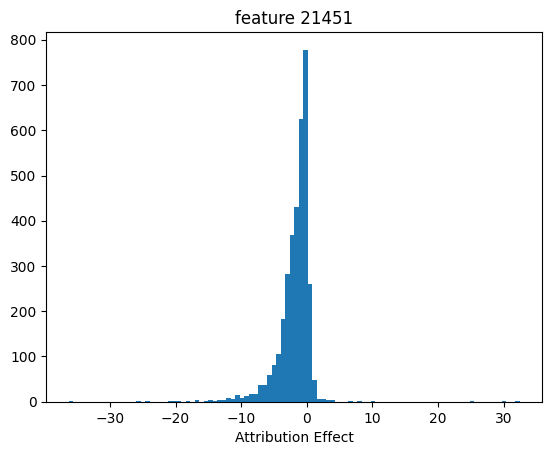

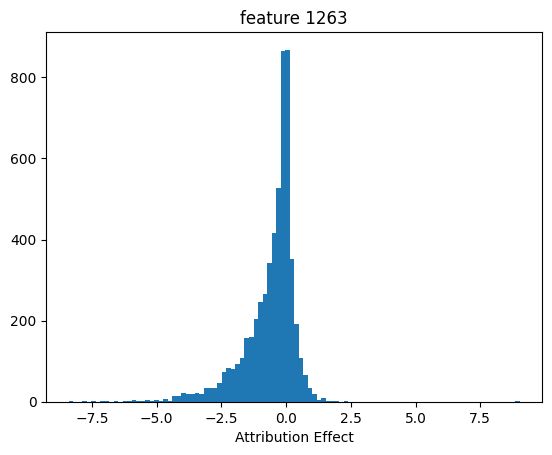

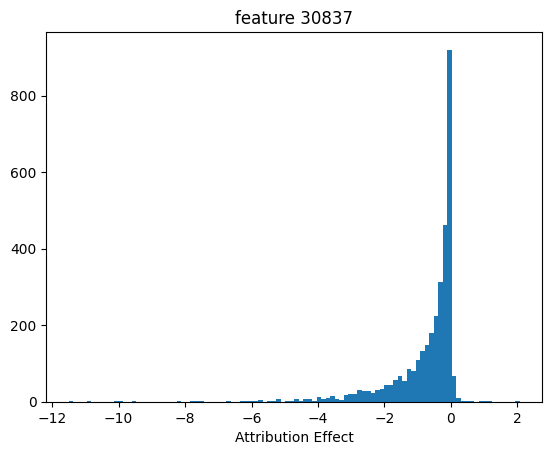

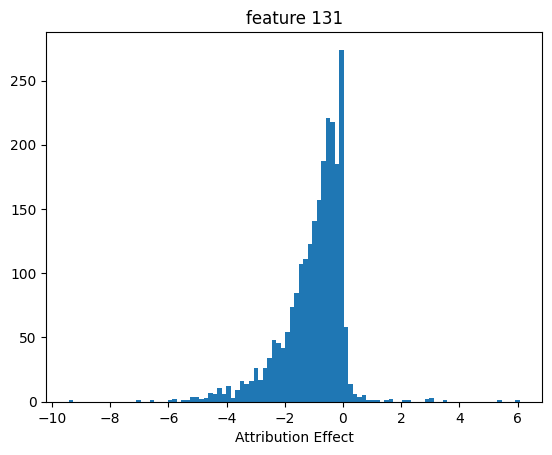

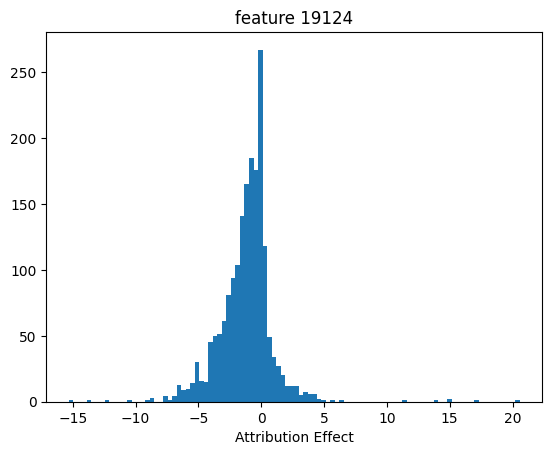

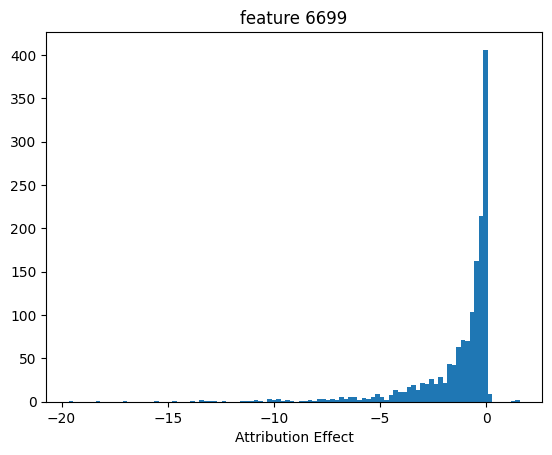

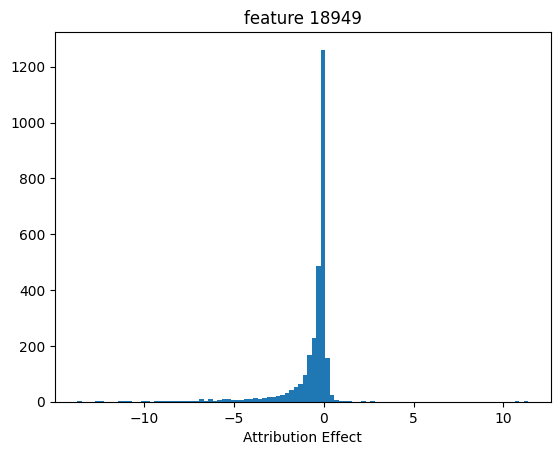

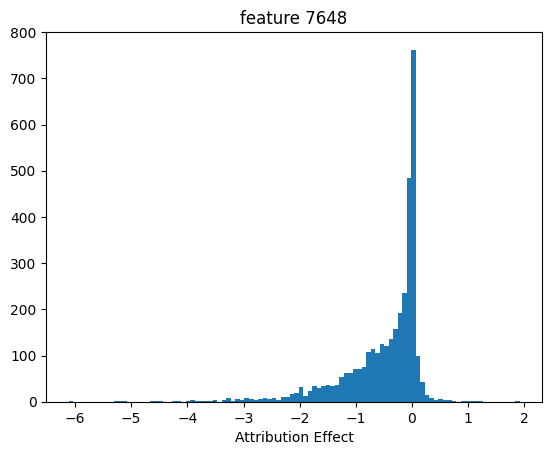

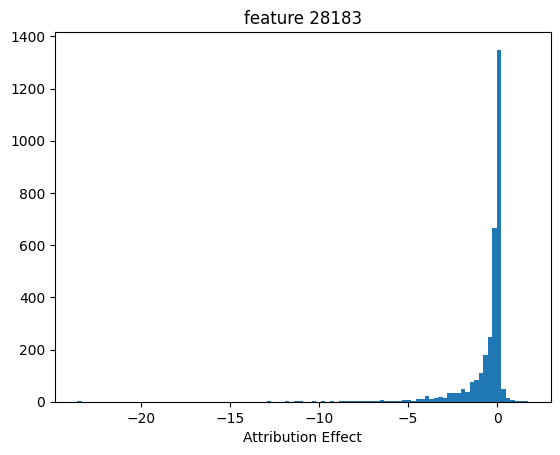

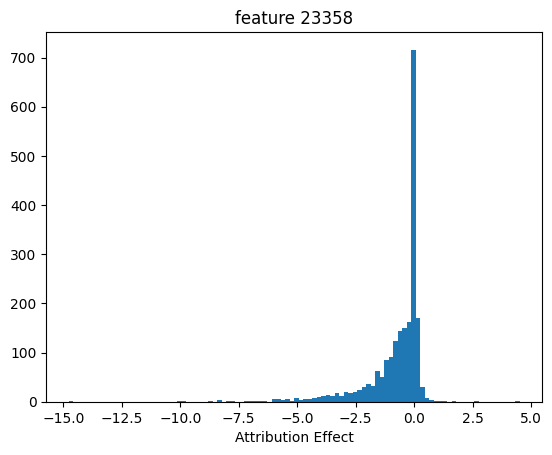

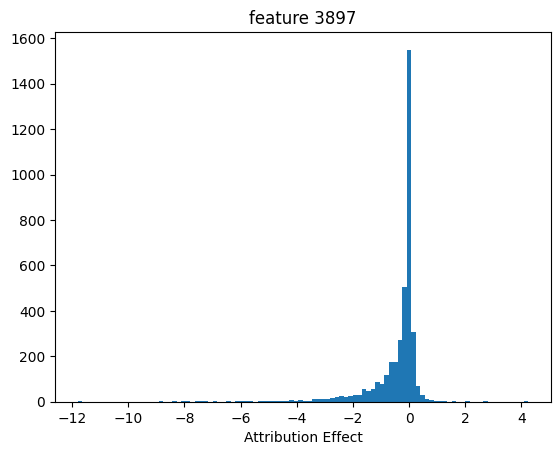

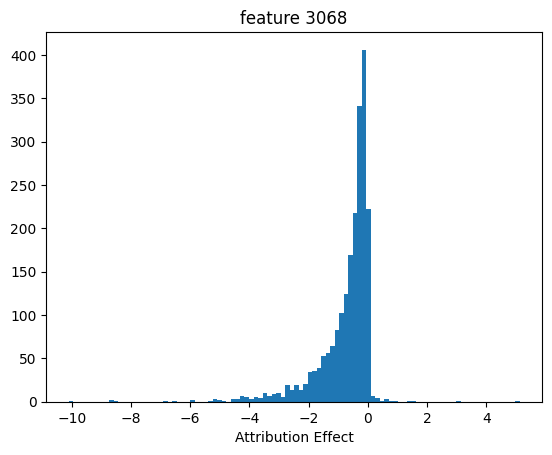

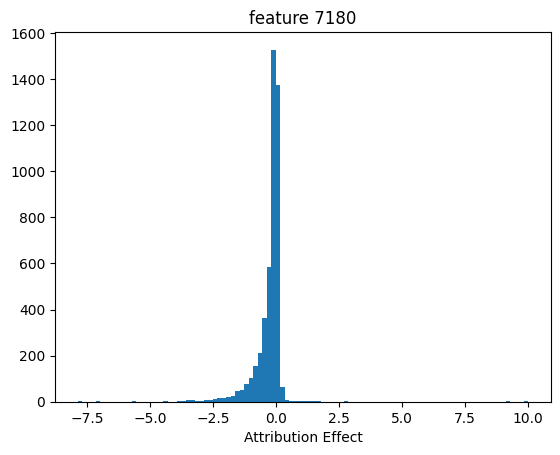

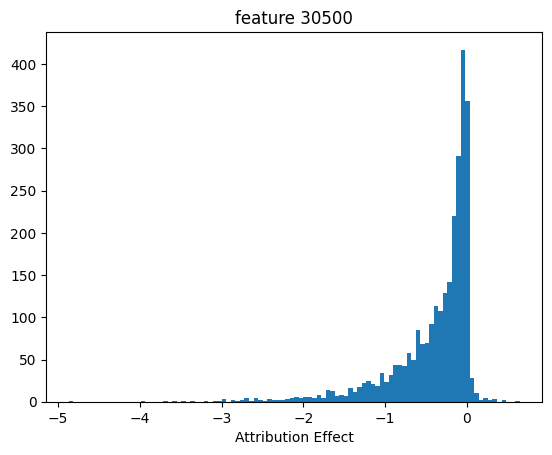

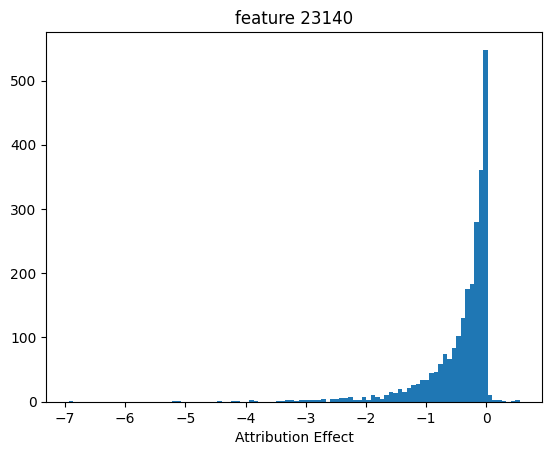

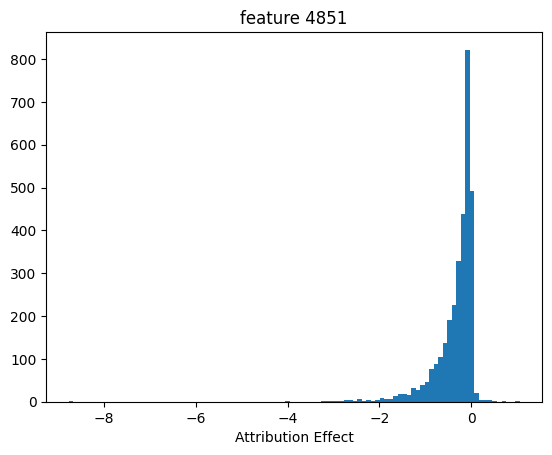

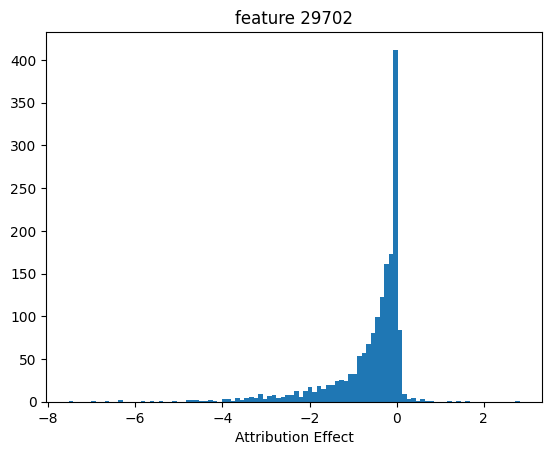

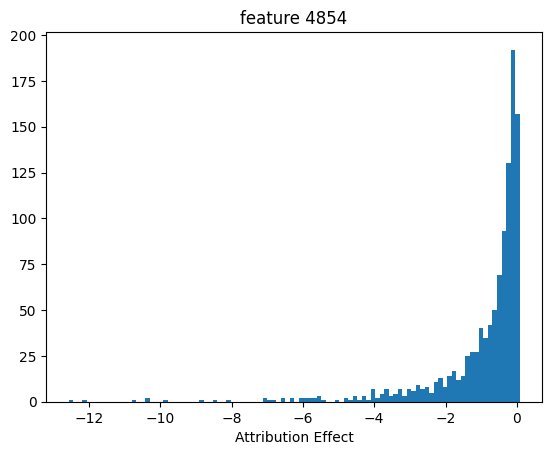

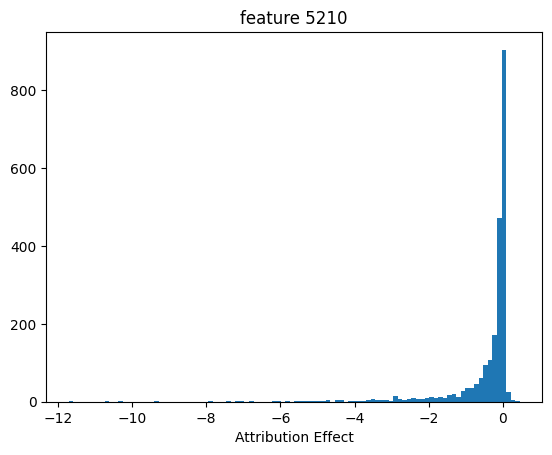

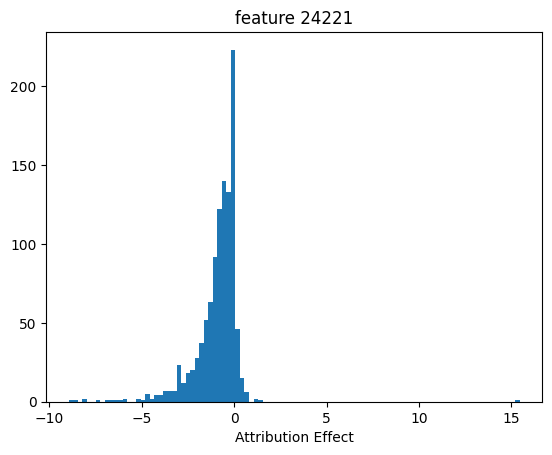

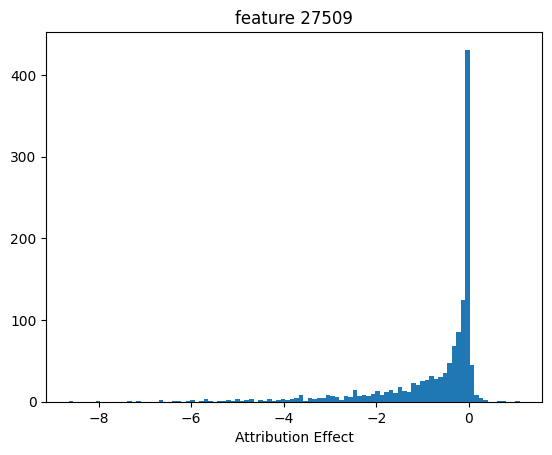

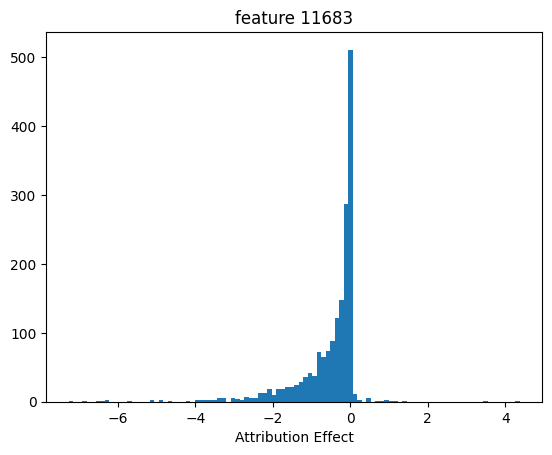

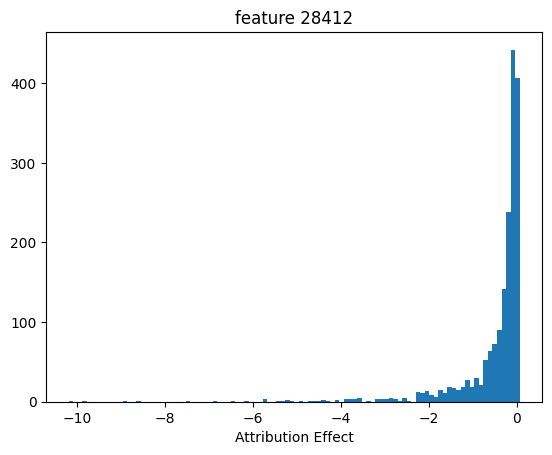

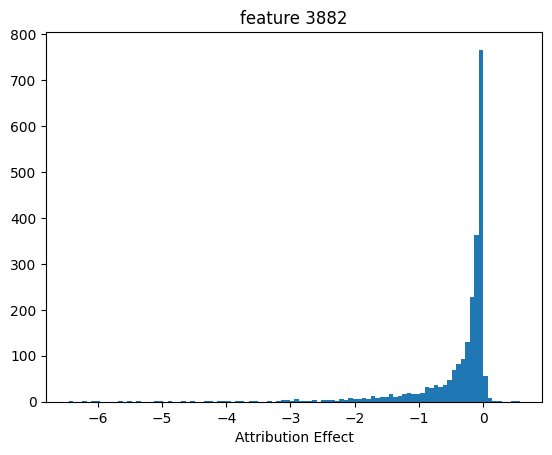

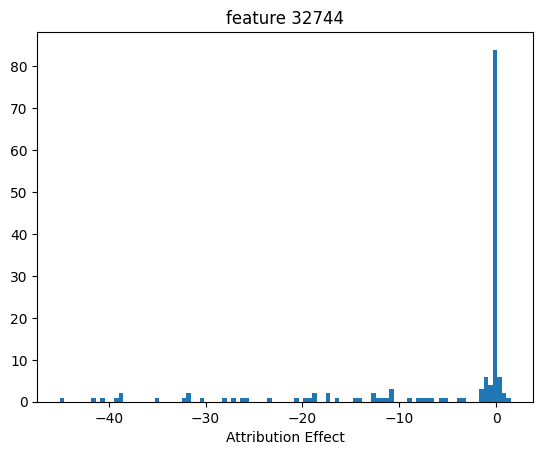

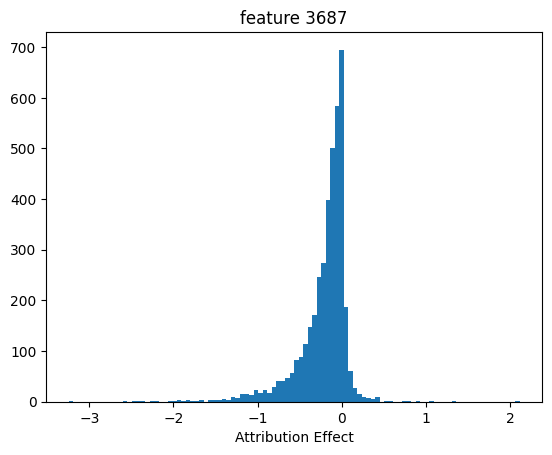

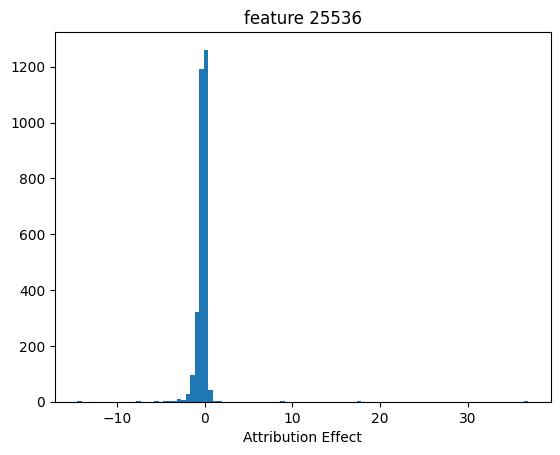

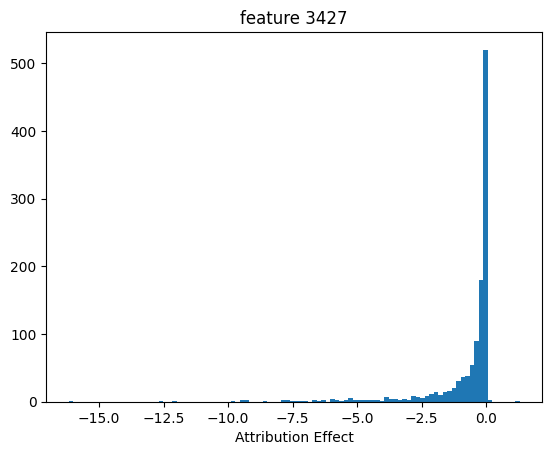

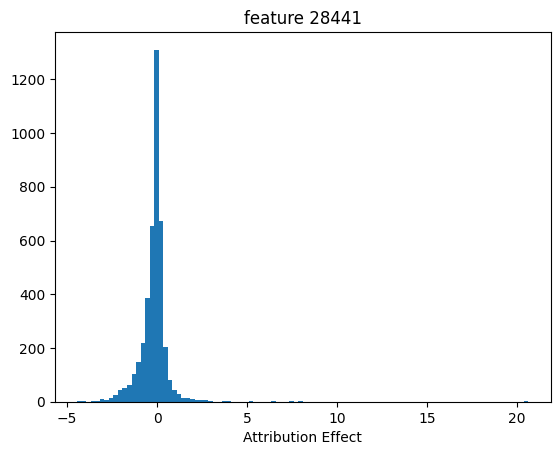

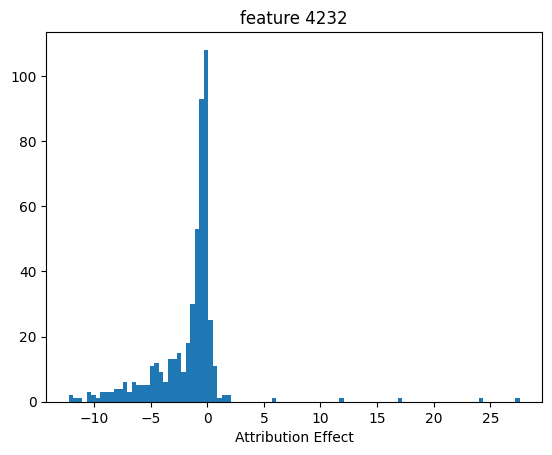

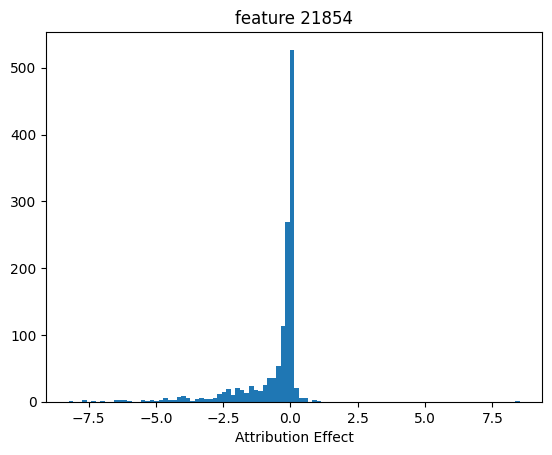

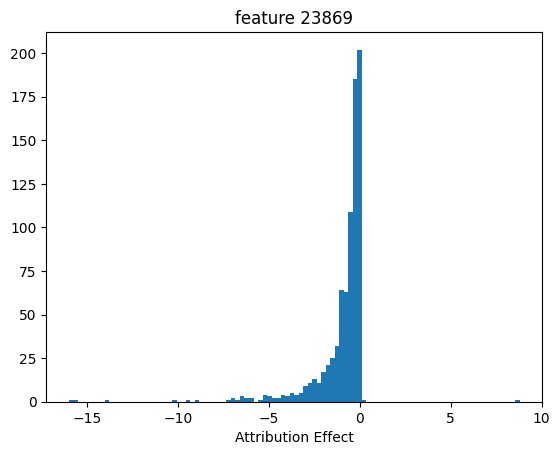

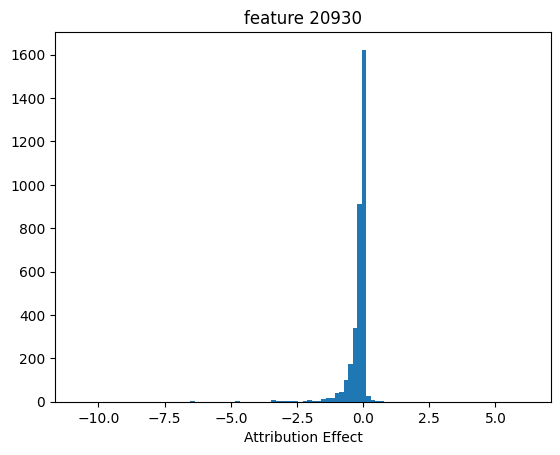

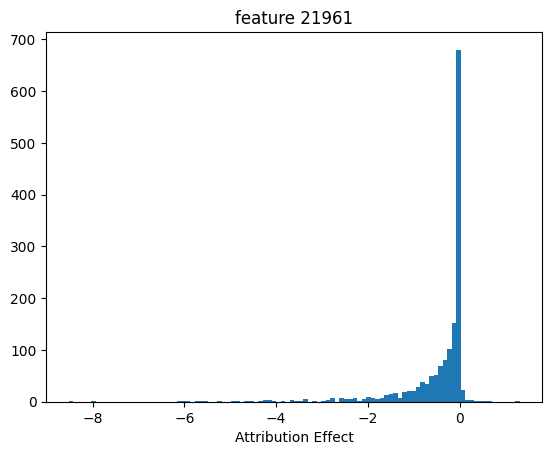

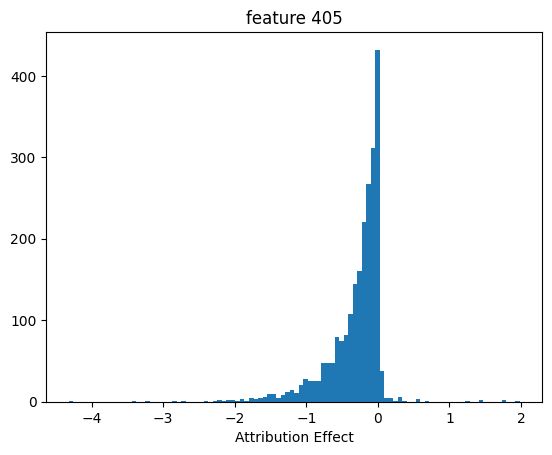

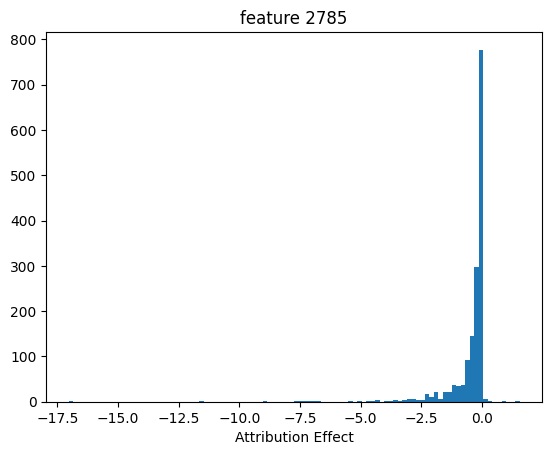

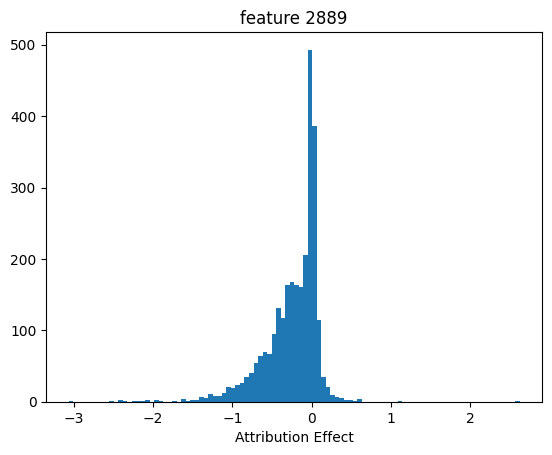

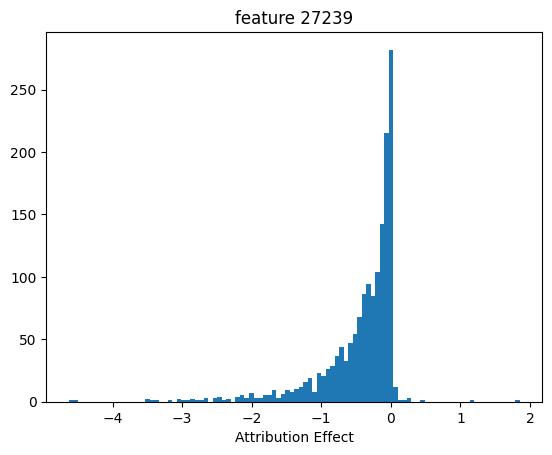

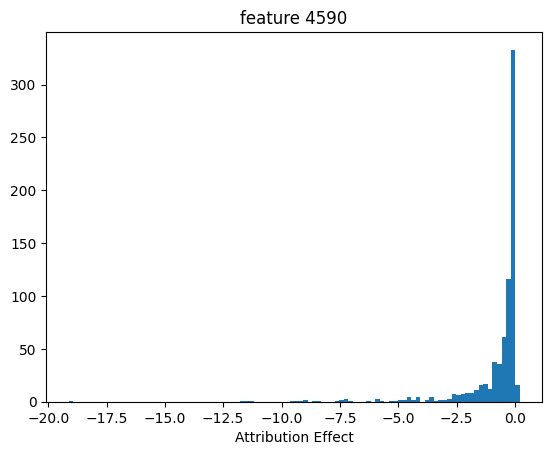

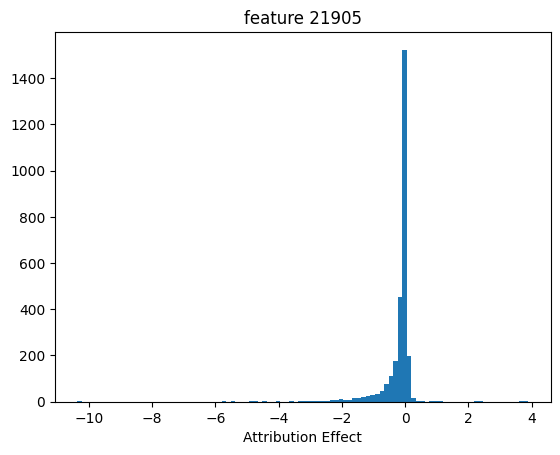

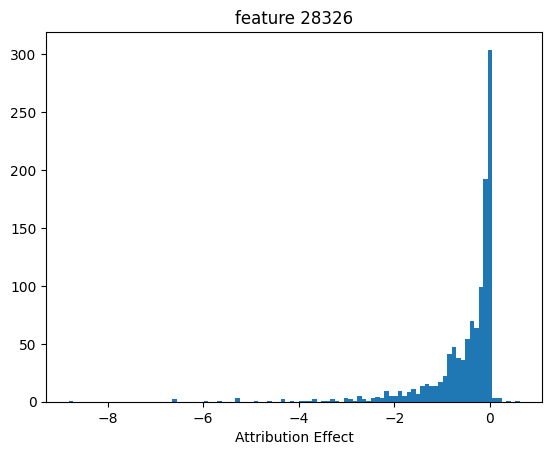

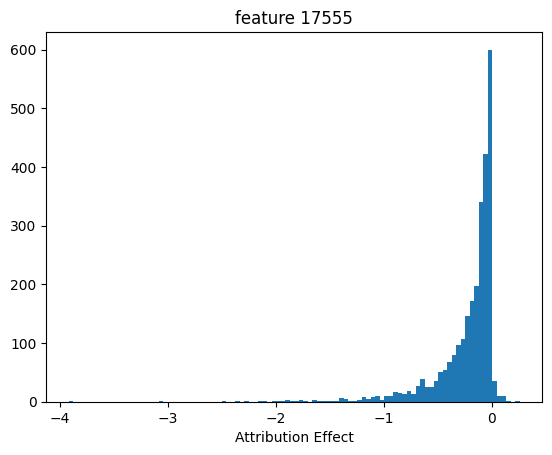

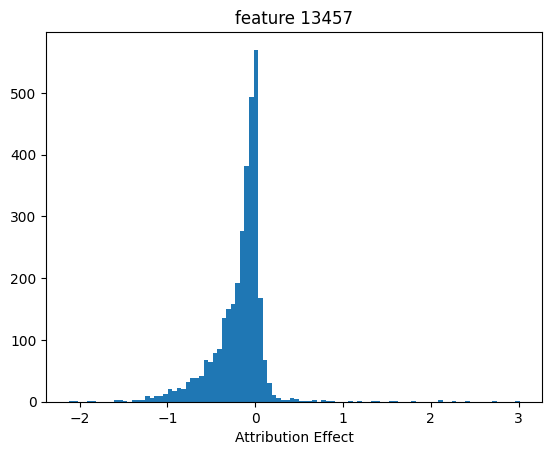

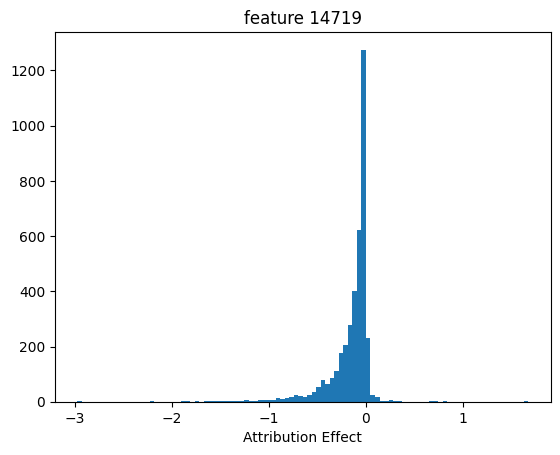

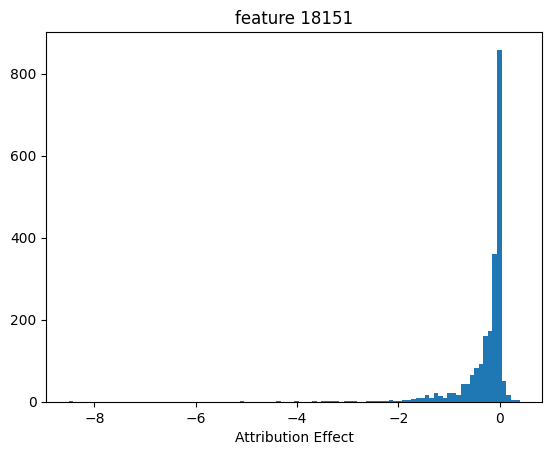

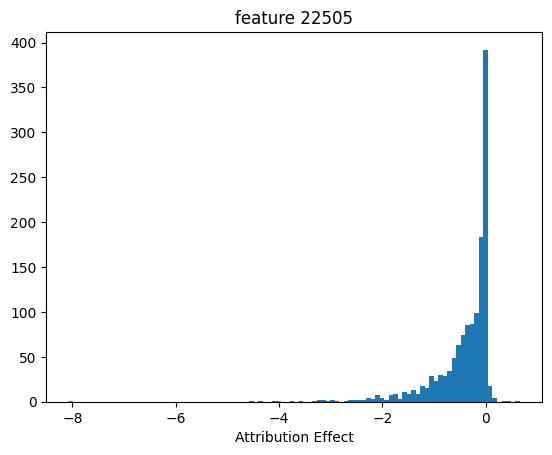

In [31]:
top_features = eff.topk(50, largest=False).indices
for eff_ind in top_features:
    e1 = all_effects[:, eff_ind]
    e1 = e1[e1 != 0]
    # new figure
    plt.figure()
    plt.hist(e1, bins=100)
    plt.title(f'feature {eff_ind}')
    plt.xlabel('Attribution Effect')
plt.show()

In [24]:
eff.topk(50), eff.topk(50, largest=False)

(torch.return_types.topk(
 values=tensor([58203.3125, 28123.4043, 11263.1689,  8581.7266,  4094.5042,  3566.5110,
          3518.7002,  3199.7368,  3005.3760,  2379.2134,  2004.6671,  1954.2616,
          1785.2908,  1735.8361,  1723.2358,  1662.7590,  1242.6887,  1196.0062,
          1193.9380,  1103.0775,  1016.6361,   989.4786,   909.9135,   905.6407,
           890.9174,   858.9294,   726.7266,   704.3128,   690.4381,   662.9177,
           648.5291,   643.4177,   629.6222,   626.1650,   621.1404,   612.1946,
           606.1761,   595.6824,   590.6498,   583.5894,   550.7310,   524.5336,
           521.0654,   506.8387,   481.3167,   480.8120,   473.8512,   468.4112,
           455.8617,   441.9365]),
 indices=tensor([ 2420,  4353, 17207, 14450, 22933, 12192, 18210, 17272,  7803,  6165,
          9982,  1841, 15487, 22643, 24500, 17368, 28571, 21061, 26280, 20317,
         27070, 14891, 13558, 11612, 13880, 15205,  7146, 19537, 12312, 29927,
         10117, 19641, 28788, 24862, 29

In [15]:
eff.topk(20)

torch.return_types.topk(
values=tensor([58203.3125, 28123.4043, 11263.1689,  8581.7266,  4094.5042,  3566.5110,
         3518.7002,  3199.7368,  3005.3760,  2379.2134,  2004.6671,  1954.2616,
         1785.2908,  1735.8361,  1723.2358,  1662.7590,  1242.6887,  1196.0062,
         1193.9380,  1103.0775]),
indices=tensor([ 630, 1115, 4398, 3691, 5828, 3114, 4650, 4418, 2026, 1598, 2547,  487,
        3963, 5760, 6228, 4447, 7248, 5353, 6670, 5163]))

In [3]:
# consistent
pos_only = ((total_reward_diff > 0).sum(-1) == 10)
neg_only = ((total_reward_diff < 0).sum(-1) == 10)
tmp_reward = total_reward_diff.clone()
tmp_reward[~pos_only & ~neg_only] = 0
pos_only.sum(), neg_only.sum()

(tensor(993), tensor(134))

In [12]:
# max
total_reward_diff.max(-1).values.topk(10), total_reward_diff.min(-1).values.topk(10, largest=False)
pos, neg = total_reward_diff.max(-1).values.topk(10).indices, total_reward_diff.min(-1).values.topk(10, largest=False).indices
total_reward_diff[pos]
nz_feature_ind[pos], nz_feature_ind[neg]

(tensor([20512, 32744, 15180, 29242, 24970, 17262, 30366, 28839,  1197, 26364]),
 tensor([23586,  2420, 19945,  1871, 15537, 32048, 15994, 28736, 32724, 10647]))

In [15]:
# mean
pos, neg = total_reward_diff.mean(-1).topk(10).indices, total_reward_diff.mean(-1).topk(10, largest=False).indices
total_reward_diff[pos]
total_reward_diff.mean(-1).topk(10), total_reward_diff.mean(-1).topk(10, largest=False)
nz_feature_ind[pos], nz_feature_ind[neg]

(tensor([32744, 20512, 29242,  1197, 15180,  6921, 30221,  7234, 17262, 12328]),
 tensor([ 2420, 23586, 19945, 14450, 22933, 32048, 18119, 24651,  4353, 11612]))

In [23]:
tmp_reward.sum(-1).topk(10), tmp_reward.sum(-1).topk(10, largest=False)

(torch.return_types.topk(
 values=tensor([47.1262, 37.1970, 20.3115, 15.5119, 14.2063, 14.1882, 13.2903, 12.4759,
         11.4827, 11.4094]),
 indices=tensor([9173, 5734, 8192,  340, 1998, 8466, 2082, 4854, 6811,  996])),
 torch.return_types.topk(
 values=tensor([-40.1438, -33.9029, -12.5370, -12.0577,  -7.9758,  -7.0178,  -6.1965,
          -6.0784,  -5.0111,  -4.9518]),
 indices=tensor([ 695, 6607, 4070, 6427, 1235, 3288, 4888, 5121,  476, 2243])))

In [24]:
top_ind = tmp_reward.sum(-1).topk(10).indices
low_ind = tmp_reward.sum(-1).topk(10, largest=False).indices
# pos_only_ind = pos_only[top_ind]
# neg_only_ind = neg_only[low_ind]
# pos_only_ind, neg_only_ind

In [20]:
top_ind, pos_only

(tensor([992, 613, 890,  29, 208, 918, 216, 512, 737,  93]),
 torch.Size([9180]))

In [25]:
nz_feature_ind[top_ind], nz_feature_ind[low_ind]

(tensor([32744, 20512, 29242,  1197,  6921, 30221,  7234, 17262, 24335,  3498]),
 tensor([ 2420, 23586, 14450, 22933,  4353, 11612, 17368, 18210,  1625,  7803]))

In [14]:
neg_only

tensor([False, False, False,  ..., False, False, False])

In [16]:
top_ind

torch.return_types.topk(
values=tensor([47.1262, 37.1970, 20.3115, 15.5119, 14.2063, 14.1882, 13.2903, 12.4759,
        11.4827, 11.4094]),
indices=tensor([992, 613, 890,  29, 208, 918, 216, 512, 737,  93]))